In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [36]:
nyt_df.topic.unique()

array(['Environment', 'Technology', 'Politics', 'Financial', 'World',
       'Health', 'Energy', 'Business', 'Science', 'Education', 'Foreign'],
      dtype=object)

In [49]:
def correct_topics(input_topic):
    lower_str = str(input_topic).lower()
    output = None
    
    if lower_str=='business':
        output = 'financial'
    
    elif lower_str=='education':
        output = 'politics'
    
    elif lower_str=='energy':
        output = 'environment'
    
    elif lower_str=='science':
        output = 'technology'
    
    elif lower_str=='foreign':
        output = 'world'
    
    else:
        output = lower_str
        
    return output




,url,topic,temp_topic
0,https://www.nytimes.com/interactive/2023/03/15...,environment,Environment
1,https://www.nytimes.com/interactive/2023/02/17...,environment,Environment
2,https://www.nytimes.com/2023/02/14/business/te...,environment,Environment
3,https://www.nytimes.com/2023/02/02/climate/bra...,environment,Environment
4,https://www.nytimes.com/2023/01/20/business/ec...,environment,Environment
...,...,...,...
10556,https://www.nytimes.com/1977/11/25/archives/fo...,world,Foreign
10557,https://www.nytimes.com/1988/12/18/opinion/for...,world,Foreign
10558,https://www.nytimes.com/2007/03/04/opinion/nyr...,world,Foreign
10559,https://www.nytimes.com/1986/12/08/sports/spor...,world,Foreign


In [54]:
fox_df = pd.read_csv('../data/v2/fox-news-map.csv')
fox_df = fox_df[fox_df['tag']!='VIDEO'][['link','topic']].drop_duplicates()
fox_df.rename(columns={'link':'url'},inplace=True)
fox_df['view'] = 'conservative'

nyt_df = pd.read_json('../data/v2/nyt-news-map.json')
nyt_df['temp_topic'] = nyt_df['topic']
nyt_df['topic'] = nyt_df['temp_topic'].apply(correct_topics)
nyt_df['view'] = 'liberal'

df = pd.concat([fox_df, nyt_df])
df

,url,topic,view,temp_topic
0,https://www.foxnews.com/politics/democrats-fav...,environment,conservative,NaN
1,https://www.foxnews.com/politics/biden-admin-a...,environment,conservative,NaN
4,https://www.foxnews.com/media/bidens-electric-...,environment,conservative,NaN
5,https://www.foxnews.com/media/media-praise-eco...,environment,conservative,NaN
6,https://www.foxnews.com/politics/farmers-score...,environment,conservative,NaN
...,...,...,...,...
10556,https://www.nytimes.com/1977/11/25/archives/fo...,world,liberal,Foreign
10557,https://www.nytimes.com/1988/12/18/opinion/for...,world,liberal,Foreign
10558,https://www.nytimes.com/2007/03/04/opinion/nyr...,world,liberal,Foreign
10559,https://www.nytimes.com/1986/12/08/sports/spor...,world,liberal,Foreign


In [66]:
import matplotlib.patches as mpatches

freq2way_ratio = df.groupby(['topic','view']).agg({'url':'nunique'}).reset_index()
freq2way_ratio.rename(columns={'url':'articles'},inplace=True)
# freq2way_ratio['articles_by_topic'] = freq2way_ratio.groupby(['topic']).transform('sum')
freq2way_ratio = freq2way_ratio.pivot_table(index=['topic'],columns=['view']).reset_index()
freq2way_ratio.columns=['view','conservative','liberal']
freq2way_ratio.set_index(keys='view',inplace=True)
freq2way_ratio

,conservative,liberal
view,,
environment,2747,2260
financial,1437,1622
health,5398,1413
politics,1689,1844
technology,3550,1990
world,2429,1432


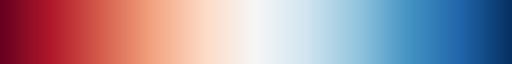

In [121]:
import matplotlib
cmap = matplotlib.cm.get_cmap('RdBu')
cmap

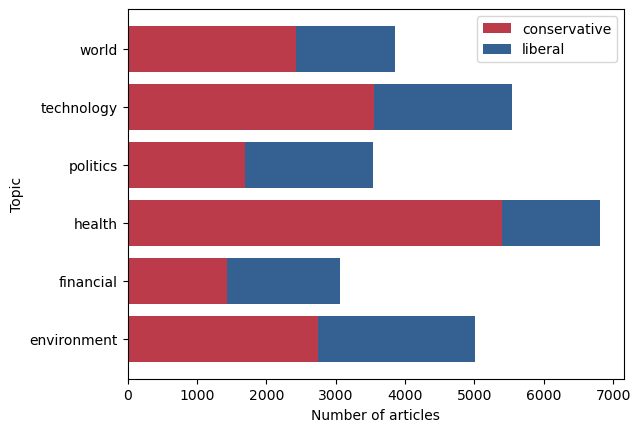

In [134]:
views = freq2way_ratio.columns.tolist()
colors = [cmap(25),cmap(245)]

fig, ax = plt.subplots()
left = len(freq2way_ratio)*[0]

for i, view in enumerate(views):
    ax.barh(freq2way_ratio.index, freq2way_ratio[view], left=left, color=colors[i],
            alpha=0.85, label=view)
    left+=freq2way_ratio[view]
    
ax.legend()
ax.set_xlabel('Number of articles')
ax.set_ylabel('Topic')
fig.savefig('article-view-split.png', dpi=300, bbox_inches="tight")
plt.show()